In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
x = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])
y = np.array([[0], [1], [1], [0]])

print("The shape of X is ", x.shape)
print("The shape of Y is ", y.shape)

The shape of X is  (4, 3)
The shape of Y is  (4, 1)


In [53]:
def act_sigmoid(z):
    return 1/(1+np.exp(-z))
def grad_sigmoid(z):
    return z*(1-z)
def sse(y, output):
    return np.sum(np.power(y-output, 2))

In [54]:
class nn_toy:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.alphas = np.random.rand(self.x.shape[1], 4)
        self.betas = np.random.rand(4,1)
        self.output = np.zeros(self.y.shape)
        
    def forward_process(self):
        self.H = act_sigmoid(np.dot(self.x, self.alphas))
        self.output = act_sigmoid(np.dot(self.H, self.betas))
        
    def backprop_process(self):
        grad_betas = np.dot(self.H.T, (2*(self.y-self.output)*grad_sigmoid(self.output)))
        grad_alphas = np.dot(self.x.T, (np.dot(2*(self.y-self.output)*grad_sigmoid(self.output),self.betas.T)*grad_sigmoid(self.H)))
       
        self.alphas +=grad_alphas
        self.betas +=grad_betas

In [55]:
my_data = nn_toy(x,y)

for i in range(1500):
    my_data.forward_process()
    my_data.backprop_process()
    print("SSE:", sse(y, my_data.output))

SSE: 1.3179181085908627
SSE: 1.0445148048297193
SSE: 1.000408689140267
SSE: 0.9999961466287961
SSE: 0.9998507284778952
SSE: 0.9997127787628579
SSE: 0.999575143496932
SSE: 0.9994373762048074
SSE: 0.9992992061850612
SSE: 0.9991603677620363
SSE: 0.9990205952327753
SSE: 0.9988796222823788
SSE: 0.9987371815111403
SSE: 0.9985930039728774
SSE: 0.9984468187195339
SSE: 0.9982983523514755
SSE: 0.9981473285729379
SSE: 0.9979934677521571
SSE: 0.9978364864857789
SSE: 0.9976760971672007
SSE: 0.9975120075585785
SSE: 0.9973439203662811
SSE: 0.997171532819642
SSE: 0.9969945362529273
SSE: 0.9968126156904891
SSE: 0.9966254494351461
SSE: 0.996432708659891
SSE: 0.9962340570030837
SSE: 0.9960291501673544
SSE: 0.9958176355224955
SSE: 0.9955991517126872
SSE: 0.9953733282684472
SSE: 0.9951397852237662
SSE: 0.9948981327389304
SSE: 0.9946479707295843
SSE: 0.9943888885026484
SSE: 0.9941204643997195
SSE: 0.9938422654486522
SSE: 0.9935538470240247
SSE: 0.9932547525172302
SSE: 0.9929445130169436
SSE: 0.9926226470007

In [56]:
print("_______________________")
print("+      predicted       ")
print("_______________________")
print(my_data.output)

_______________________
+      predicted       
_______________________
[[0.01839933]
 [0.97339921]
 [0.9873274 ]
 [0.0244896 ]]


In [57]:
pip install tensorflow

In [58]:
from keras.datasets import mnist
train_set, test_set = mnist.load_data()
x_train, y_train = train_set
x_test, y_test = test_set

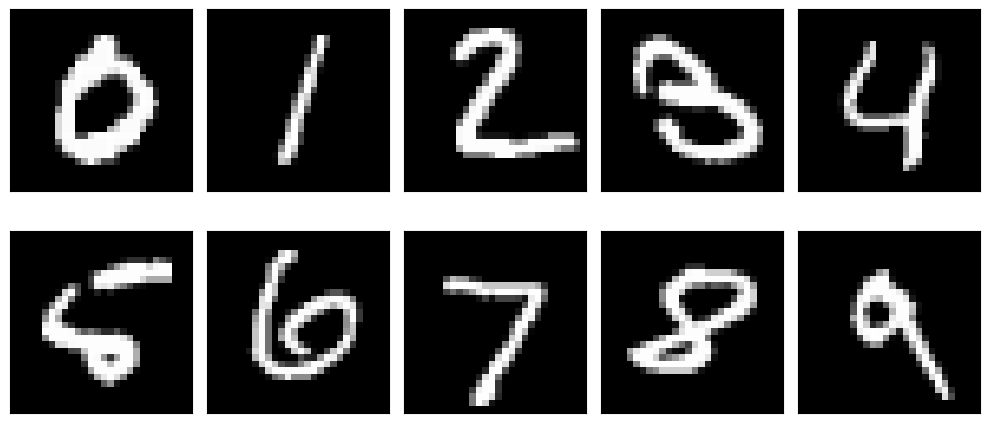

In [59]:
flg, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2,5, figsize=(10, 5))

for idx, ax in enumerate([ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]):
    for i in range(1000):
        if y_test[i] == idx:
            ax.imshow(x_test[i], cmap='gray')
            ax.grid(False)
            ax.set_xticks([])
            ax.set_yticks([])
            break
plt.tight_layout()
plt.show()

In [60]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [61]:
x_train_vec = x_train.reshape((x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
x_test_vec = x_test.reshape((x_test.shape[0], x_test.shape[1]*x_test.shape[2]))

print("The dim of x_train: ", x_train_vec.shape)
print("The dim of x_test: ", x_test_vec.shape)

The dim of x_train:  (60000, 784)
The dim of x_test:  (10000, 784)


In [62]:
x_train_vec = x_train_vec/255.
x_test_vec = x_test_vec/255.

In [63]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [64]:
from keras.utils import to_categorical

y_train = to_categorical(y_train ,10)
y_test = to_categorical(y_test, 10)

In [65]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

num_classes = 10
my_model = Sequential()
my_model.add(Dense(units = 20, input_shape = (x_train_vec.shape[1],),activation = 'relu'))
my_model.add(Dense(units = num_classes, activation='softmax'))

In [67]:
my_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 20)                15700     
                                                                 
 dense_13 (Dense)            (None, 10)                210       
                                                                 
Total params: 15910 (62.15 KB)
Trainable params: 15910 (62.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD, Adam, RMSprop

In [69]:
num_classes = 10
my_model2 = Sequential()
my_model2.add(Dense(units = 512, input_shape = (x_train_vec.shape[1], )))
my_model2.add(Activation('relu'))
my_model2.add(Dropout(0.2))
my_model2.add(Dense(units = 512))
my_model2.add(Activation('relu'))
my_model2.add(Dropout(0.2))
my_model2.add(Dense(units = num_classes))
my_model2.add(Activation('softmax'))

In [70]:
my_model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 activation_10 (Activation)  (None, 512)               0         
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_15 (Dense)            (None, 512)               262656    
                                                                 
 activation_11 (Activation)  (None, 512)               0         
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 10)               

In [71]:
my_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
my_model.fit(x_train_vec, y_train, epochs = 10, verbose = 1)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0175
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0104
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0089
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0079
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0073
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0068
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0064
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0061
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0058
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0055


In [72]:
my_model2.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
my_model2.fit(x_train_vec, y_train, epochs = 10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2180 - accuracy: 0.9330
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1043 - accuracy: 0.9677
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0802 - accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0682 - accuracy: 0.9787
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0566 - accuracy: 0.9818
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0522 - accuracy: 0.9835
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0456 - accuracy: 0.9858
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0420 - accuracy: 0.9869
Epoch 9/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0391 - accuracy: 0.9878
Epoch 10/10
1875/1875 [==============================] - 16s 8ms/step - l

In [73]:
output = my_model2.predict(x_test_vec)

313/313 [==============================] - 1s 2ms/step


In [75]:
output[0, :]

array([1.1050648e-13, 7.4024425e-11, 2.2945984e-07, 1.7218008e-08,
       1.4678755e-10, 6.0680459e-13, 1.4785905e-17, 9.9999976e-01,
       7.7271252e-11, 7.1282553e-09], dtype=float32)

In [76]:
from sklearn.metrics import classification_report

predicted_labels = np.argmax(output, axis=1)

true_labels = np.argmax(y_test, axis=1)

print(classification_report(true_labels, predicted_labels))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.99      0.98       982
           5       0.99      0.96      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

